# Building a brain object

Brain objects are supereeg's fundamental data structure for a single subject's iEEG data.  To create one at minimum you'll need a matrix of neural recordings (time samples by electrodes), electrode locations, and a sample rate. Additionally, you can include information about separate recording sessions and store custom meta data. In this tutorial, we'll build a brain object from scratch and get familiar with some of the methods.

# Load in the required libraries

In [1]:
import warnings 
warnings.simplefilter("ignore")
%matplotlib inline
import supereeg as se
import numpy as np

# Simulate some data

First, we'll use supereeg's built in simulation functions to simulate some data and electrodes. By default, the `simulate_data` function will return a 1000 samples by 10 electrodes matrix, but you can specify the number of time samples with `n_samples` and the number of electrodes with `n_elecs`. If you want further information on simulating data, check out the simulate tutorial!

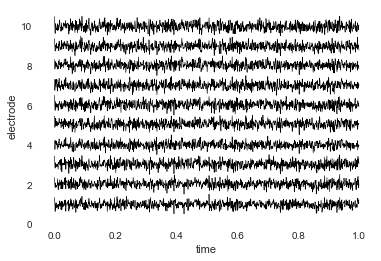

In [2]:
# simulate some data
bo_data = se.simulate_bo(n_samples=1000, sessions=2, n_elecs=10)

# plot it
bo_data.plot_data()

# get just data
data = bo_data.get_data()

We'll also simulate some electrode locations

In [3]:
locs = se.simulate_locations()
print(locs)

    x   y   z
0  42  -2 -29
1  41  44 -19
2   6  38  28
3  41 -16 -31
4  47  -6 -39
5   6 -12  27
6  33 -33  18
7  13  -6 -15
8 -17 -34  21
9  -2 -28   9


# Creating a brain object

To construct a new brain objects, simply pass the data and locations to the `Brain` class like this:

In [4]:
bo = se.Brain(data=data, locs=locs, sample_rate=100)

To view a summary of the contents of the brain object, you can call the `info` function:

In [5]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [10.]
Sample Rate in Hz: [100]
Number of sessions: 1
Date created: Sun Mar  4 16:42:11 2018
Meta data: {}


Optionally, you can pass a `sessions` parameter, which is can be a numpy array or list the length of your data with a unique identifier for each session.  For example:

In [6]:
sessions = np.array([1]*(data.shape[0]/2)+[2]*(data.shape[0]/2))
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Sun Mar  4 16:42:11 2018
Meta data: {}


You can also pass add custom meta data to the brain object to help keep track of its contents. `meta` is a dictionary comprised of whatever you want:

In [7]:
meta = {
    'subjectID' : '123',
    'Investigator' : 'Andy',
    'Hospital' : 'DHMC'
}
bo = se.Brain(data=data, locs=locs, sample_rate=1000, sessions=sessions, meta=meta)
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [1000, 1000]
Number of sessions: 2
Date created: Sun Mar  4 16:42:11 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


# Initialize brain objects

Brain objects can be initialized by passing a brain object (ending in `.bo`), but can also be initialized with a model object or nifti object by specifying `return_type` as `bo` in the load function.  

For example, you can load a nifti object as a brain object: 

In [27]:
se.load('example_nifti', return_type='bo')

# The structure of a brain object

Inside the brain object, the iEEG data is stored as a Pandas DataFrame that can be accessed directly:

In [8]:
bo.data.head()

,0,1,2,3,4,5,6,7,8,9
0,1.675180,1.559958,1.685606,1.272931,1.891001,1.741816,1.795181,1.228396,1.597348,1.942893
1,0.324873,-0.164331,-0.267548,-1.402379,-0.871805,-0.372169,-1.607298,-0.950362,-0.103155,-0.099456
2,-1.660238,-0.873658,-0.813616,-0.890747,-0.486636,-1.080152,-0.266481,-0.708921,-1.044206,-1.392324
3,0.134078,0.250453,0.282380,0.512702,0.137633,0.617051,-0.052206,0.717071,-0.158949,0.591187
4,-0.922147,-0.725250,-0.484589,1.243200,1.397615,0.035693,1.785213,0.789005,0.256629,0.277961


or returned as a numpy array using the `get_data` method:

In [9]:
bo.get_data()

array([[ 1.67517997,  1.55995794,  1.68560646, ...,  1.22839624,
         1.59734762,  1.94289274],
       [ 0.32487251, -0.16433136, -0.26754798, ..., -0.95036215,
        -0.10315451, -0.09945627],
       [-1.66023777, -0.87365818, -0.81361551, ..., -0.7089209 ,
        -1.04420552, -1.3923245 ],
       ...,
       [ 0.12818881, -0.94365714,  0.30978617, ..., -0.01880522,
        -0.121842  , -0.70599195],
       [ 0.94821311,  0.86742129,  1.03440854, ..., -0.25743281,
         0.295322  ,  0.25513841],
       [ 0.29770512, -0.35731962,  0.02237167, ..., -0.8435769 ,
        -0.8674029 ,  0.12214054]])

Similarly, the electrode locations are stored as a Pandas DataFrame, and can be retrieved as a numpy array using the `get_locs` method:

In [10]:
bo.locs.head()

,x,y,z
0,42,-2,-29
1,41,44,-19
2,6,38,28
3,41,-16,-31
4,47,-6,-39


In [11]:
bo.get_locs()

array([[ 42,  -2, -29],
       [ 41,  44, -19],
       [  6,  38,  28],
       [ 41, -16, -31],
       [ 47,  -6, -39],
       [  6, -12,  27],
       [ 33, -33,  18],
       [ 13,  -6, -15],
       [-17, -34,  21],
       [ -2, -28,   9]])

You can also pass a list of indices for either `times` or `locs` and return a subset of the brain object

In [12]:
bo_s = bo.get_slice(sample_inds=[1,2,3], loc_inds=[1,2,3])
bo_s.get_data()

array([[-0.16433136, -0.26754798, -1.40237908],
       [-0.87365818, -0.81361551, -0.89074694],
       [ 0.25045281,  0.28237978,  0.51270187]])

You can resample your data by specifying a new resample rate

In [13]:
bo.resample(64)

You can also plot both the data and the electrode locations:

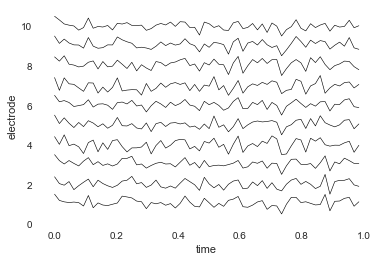

In [14]:
bo.plot_data()

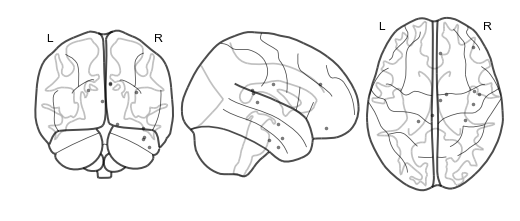

In [15]:
bo.plot_locs()

The other pieces of the brain object are listed below:

In [16]:
# array of session identifiers for each timepoint
sessions = bo.sessions

# number of sessions
n_sessions = bo.n_sessions

# sample rate
sample_rate = bo.sample_rate

# number of electrodes
n_elecs = bo.n_elecs

# length of each recording session in seconds
n_seconds = bo.n_secs

# the date and time that the bo was created
date_created = bo.date_created

# kurtosis of each electrode
kurtosis = bo.kurtosis

# meta data
meta = bo.meta

# label delinieating observed and reconstructed locations
label = bo.label

# Brain object methods

There are a few other useful methods on a brain object

## `bo.info()`

This method will give you a summary of the brain object:

In [17]:
bo.info()

Number of electrodes: 10
Recording time in seconds: [0.5 0.5]
Sample Rate in Hz: [64, 64]
Number of sessions: 2
Date created: Sun Mar  4 16:42:11 2018
Meta data: {'Hospital': 'DHMC', 'subjectID': '123', 'Investigator': 'Andy'}


## `bo.get_data()`

In [18]:
data_array = bo.get_data()

## `bo.get_zscore_data()`

This method will return a numpy array of the zscored data:

In [19]:
zdata_array = bo.get_zscore_data()

## `bo.get_locs()`

This method will return a numpy array of the electrode locations:

In [20]:
locs = bo.get_locs()

## `bo.get_slice()`
This method allows you to slice out time and locations from the brain object, and returns a brain object. This can occur in place if you set the flag `inplace=True`.

In [21]:
bo_slice = bo.get_slice(sample_inds=None, loc_inds=None, inplace=False)

## `bo.resample()`
This method allows you resample a brain object in place. 

In [22]:
bo.resample(resample_rate=None)

## `bo.plot_data()`

This method normalizes and plots data from brain object:

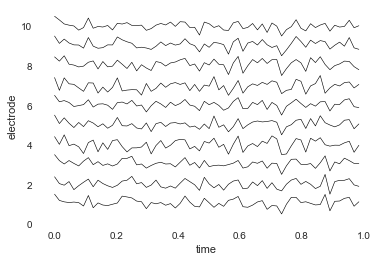

In [23]:
bo.plot_data()

## `bo.plot_locs()`
This method plots electrode locations from brain object:

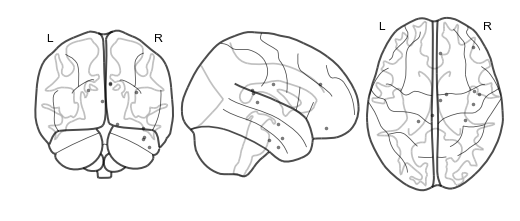

In [24]:
bo.plot_locs()

## `bo.save(fname='something')`

This method will save the brain object to the specified file location.
The data will be saved as a 'bo' file, which is a dictionary containing the elements of a brain object saved in the hd5 format using `deepdish`.

In [25]:
#bo.save(fname='brain_object')

## `bo.to_nii()`

This method converts the brain object into a `nibabel` nifti image.  If `filepath` is specified, the nifti file will be saved. You can also specify a nifti template with the `template` argument. If no template is specified, it will use the gray matter masked MNI 152 brain downsampled to 6mm.  

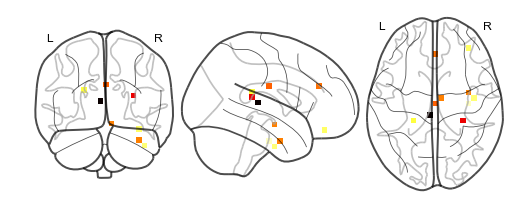

In [26]:
# convert to nifti
nii = bo.to_nii()

# plot first timepoint
nii.plot_glass_brain()

# save the file
# nii = bo.to_nii(filepath='/path/to/file/brain')

# specify a template and resolution
# nii = bo.to_nii(template='/path/to/nifti/file.nii', vox_size=20)